In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


# 시그모이드와는 다른 완벽한 원점 대칭 activation function
def tanh(x):
    return 2 / (1 + np.exp(-x * 2)) -1

In [3]:
# 초깃값
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장
activation_functions = {"sigmoid": sigmoid, "ReLU": ReLU, "tanh": tanh}

In [4]:
def make_graph(activations, activation_function):
    for i, a in activations.items():
        plt.subplot(1, len(activations), i + 1)
        plt.title(str(i + 1) + "-layer")
        if i != 0:
            plt.yticks([], [])
            
        if(activation_function == "tanh"):
            plt.hist(a.flatten(), 30, range=(-1, 1))
        else:
            plt.hist(a.flatten(), 30, range=(0, 1))
    plt.show()


def weight_init_compare(activation_function):
    for weight_std in [1, 0.01, "He", "Xavier"]:
        # Weight
        std = weight_std
        if weight_std == "He":
            std = np.sqrt(2.0 / node_num)
        elif weight_std == "Xavier":
            std =  np.sqrt(1.0 / node_num)
            
        w = np.random.randn(node_num, node_num) * std
        
        print("weight std:", weight_std, "(",std,")")
        x = input_data

        for i in range(hidden_layer_size):
            if i != 0:
                x = activations[i - 1]


            # Affine
            a = np.dot(x, w)
            # Activation
            z = activation_functions[activation_function](a)

            activations[i] = z

        make_graph(activations, activation_function)

activation_function: sigmoid
weight std: 1 ( 1 )


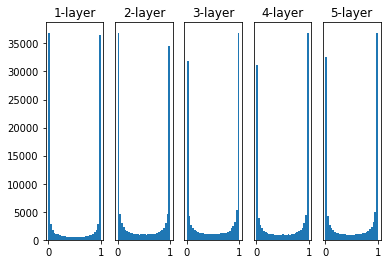

weight std: 0.01 ( 0.01 )


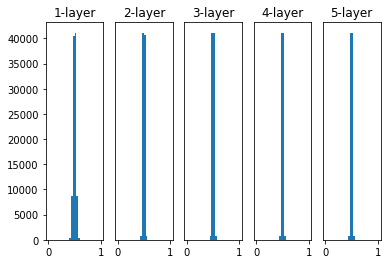

weight std: He ( 0.1414213562373095 )


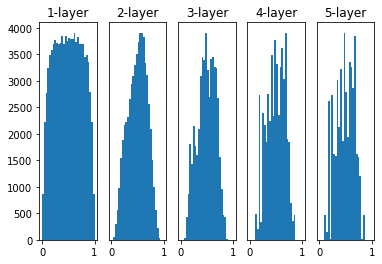

weight std: Xavier ( 0.1 )


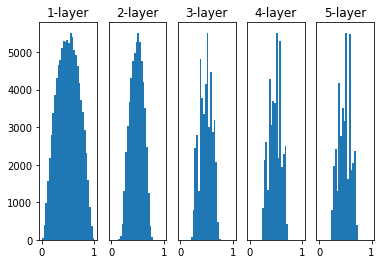

In [5]:
print("activation_function:", "sigmoid")
weight_init_compare("sigmoid")

- 표준편차를 1로 지정하니 0과 1쪽에 집중되어서 나오게 되고 이는 "기울기 소실"을 유발한다.
    - 층이 깊어지면서 문제가 생길 수 있다.
- 표준편차를 0.01로 지정하니 중앙 부분에 집중되어서 값이 나오는 "표현력 제한"이 나타났다.
    - 대부분의 뉴런이 비슷한 값을 출력하니, 뉴런을 여러 개 두는 의미가 사라진다.
- Xavier에서 가장 종 모양과 비슷하게 나타났다.
    - 원점 대칭 함수인 tanh을 이용하면 완벽한 종 모양이 나온다.

activation_function: tanh
weight std: 1 ( 1 )


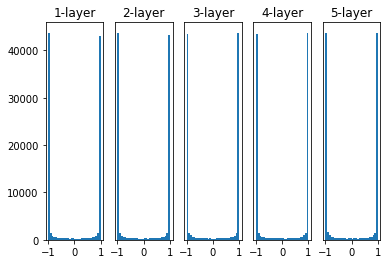

weight std: 0.01 ( 0.01 )


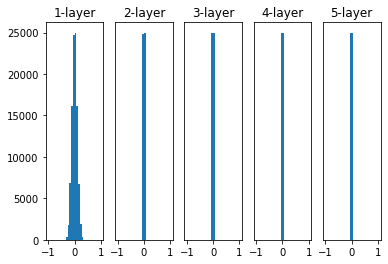

weight std: He ( 0.1414213562373095 )


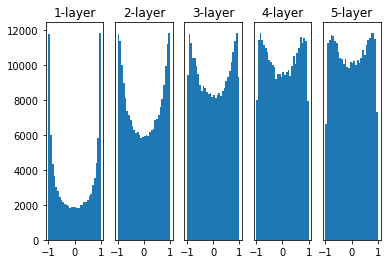

weight std: Xavier ( 0.1 )


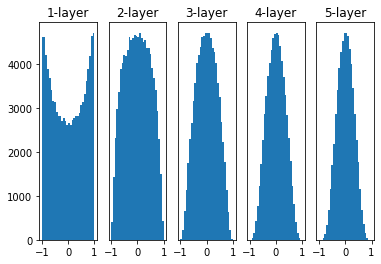

In [6]:
print("activation_function:", "tanh")
weight_init_compare("tanh")

- 원점대칭 함수인 tanh를 이용하니, Xavier에서 완벽한 종모양이 나타났다.

activation_function: ReLU
weight std: 1 ( 1 )


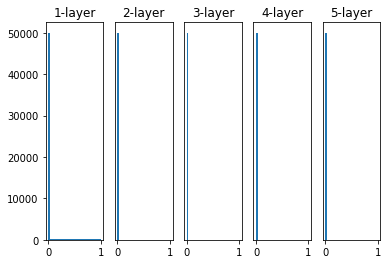

weight std: 0.01 ( 0.01 )


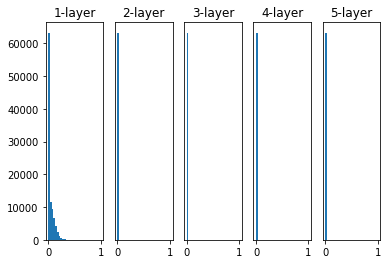

weight std: He ( 0.1414213562373095 )


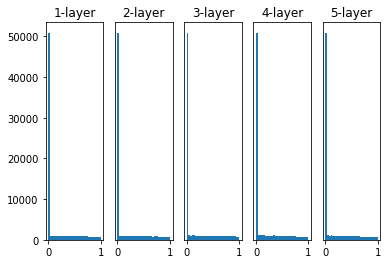

weight std: Xavier ( 0.1 )


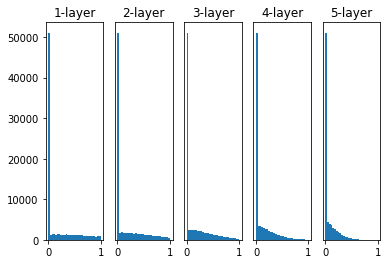

In [7]:
print("activation_function:", "ReLU")
weight_init_compare("ReLU")

- 표준편차가 1과 0.01인 경우에는 활성화 값으로 아주 작은 값이 흐른다.
- Xavier는 0쪽으로 치우침이 보인다.
- He에서는 모든 layer에서 활성화 값들이 균일하게 분포되어있다.